

---

#MLF_MPA : Final Project

---

*Madec Sacha and Kerbous Chadène*





Imports

In [1]:
pip install keras_sequential_ascii

  Preparing metadata (setup.py) ... done
  Created wheel for keras_sequential_ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3042 sha256=5970458c978012c5345fc1b67bcc5e8b53268535c28bbd67ee65fb2d702a2aa7
  Stored in directory: /root/.cache/pip/wheels/50/10/f3/5eeae758ef81ee4e16d618471561509355b0f2e5f38bf41185
Successfully built keras_sequential_ascii


In [2]:
pip install netron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN
import zipfile
import io, os
from tensorflow import keras
import matplotlib

import keras,os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dense, Flatten, Dropout
from keras.layers import MaxPooling2D
from keras.layers import MaxPool2D
from keras.optimizers import Adam
from keras.regularizers import l2
import tensorflow as tf



from keras.callbacks import ModelCheckpoint, EarlyStopping

from PIL import Image

from torchvision.models import resnet50, ResNet50_Weights
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset
from keras_sequential_ascii import keras2ascii

###Data Preparation

Unziping the files and loading the data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Open the files for Chadene**

In [5]:
zip_train_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/train_data_unlabeled.zip'
zip_test_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/test_data_unlabeled.zip'
with zipfile.ZipFile(zip_train_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_train')

with zipfile.ZipFile(zip_test_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_test')


**Open the files for Sacha**

In [ ]:
zip_train_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/train_data_unlabeled.zip'
zip_test_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/test_data_unlabeled.zip'
with zipfile.ZipFile(zip_train_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_train')

with zipfile.ZipFile(zip_test_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_test')


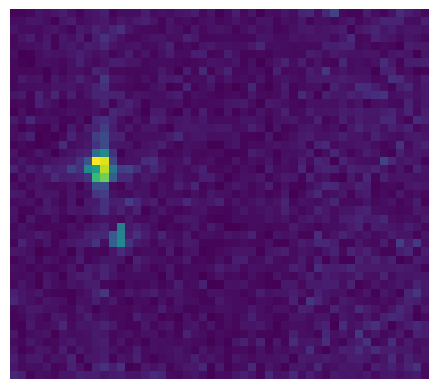

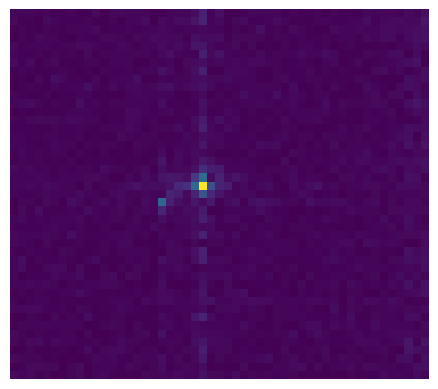

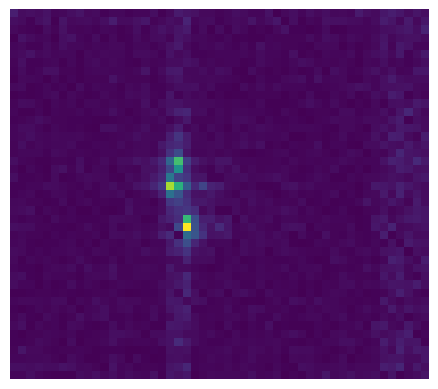

In [6]:
train_folder = '/content/x_train/train_data_unlabeled'
test_folder = '/content/x_test/test_data_unlabeled'

# Print some images
train_files_part = os.listdir(train_folder)[:3]
for file in train_files_part:
    img_path = os.path.join(train_folder, file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

**Open the files for Chadene**

In [7]:
csv_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/y_train.csv'

y_train_df = pd.read_csv(csv_path)

print(y_train_df.head())


   id  target
0   0       0
1   1       1
2   2       0
3   3       2
4   4       2


**Open the files for Sacha**

In [ ]:
csv_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/y_train.csv'

y_train_df = pd.read_csv(csv_path)

print(y_train_df.head())

   id  target
0   0       0
1   1       1
2   2       0
3   3       2
4   4       2


In [8]:
train_files = os.listdir(train_folder)
#sorting the name of the images
train_files = sorted(train_files, key=lambda x: int(x.split('_')[1][:-4]))

train_file_paths = [os.path.join(train_folder, file) for file in train_files]

y_train = y_train_df['target']


X_train = []
for file_path in train_file_paths:
    img = Image.open(file_path)
    img_array = np.array(img, dtype=np.float32) / 255.0
    img_array = img_array[:, :, :3]
    X_train.append(img_array)
X_train = np.array(X_train)


y_train_encoded = to_categorical(y_train, num_classes=4)

In [9]:
X_train.shape

(16182, 45, 51, 3)

In [14]:
test_files = os.listdir(test_folder)
#sorting the name of the images
test_files = sorted(test_files, key=lambda x: int(x.split('_')[1][:-4]))

test_file_paths = [os.path.join(test_folder, file) for file in test_files]


X_test = []
for file_path in test_file_paths:
    img = Image.open(file_path)
    img_array = np.array(img, dtype=np.float32) / 255.0
    img_array = img_array[:, :, :3]
    X_test.append(img_array)
X_test = np.array(X_test)

##test1

**CNN model (Keras API)**

In [22]:
basicmodel = Sequential()
basicmodel.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(45, 51, 3)))
basicmodel.add(MaxPooling2D((2, 2)))
basicmodel.add(Flatten())
basicmodel.add(Dense(128, activation='sigmoid'))
basicmodel.add(Dense(4, activation='softmax'))

In [23]:
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
metrics = ['accuracy']
learning_rate = 0.001

basicmodel.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [25]:
history = basicmodel.fit(X_train, y_train_encoded, epochs=10, batch_size=1000, validation_split = 0.2)
basicmodel.summary()

Epoch 1/10
13/13 [==============================] - 27s 2s/step - loss: 1.3363 - accuracy: 0.3320 - val_loss: 1.3330 - val_accuracy: 0.3457
Epoch 2/10
13/13 [==============================] - 25s 2s/step - loss: 1.3361 - accuracy: 0.3320 - val_loss: 1.3329 - val_accuracy: 0.3457
Epoch 3/10
13/13 [==============================] - 24s 2s/step - loss: 1.3361 - accuracy: 0.3320 - val_loss: 1.3328 - val_accuracy: 0.3457
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 1.3361 - accuracy: 0.3320 - val_loss: 1.3329 - val_accuracy: 0.3457
Epoch 5/10
13/13 [==============================] - 26s 2s/step - loss: 1.3361 - accuracy: 0.3320 - val_loss: 1.3328 - val_accuracy: 0.3457
Epoch 6/10
13/13 [==============================] - 26s 2s/step - loss: 1.3360 - accuracy: 0.3320 - val_loss: 1.3329 - val_accuracy: 0.3457
Epoch 7/10
13/13 [==============================] - 25s 2s/step - loss: 1.3360 - accuracy: 0.3320 - val_loss: 1.3330 - val_accuracy: 0.3457
Epoch 8/10
13/13 [==

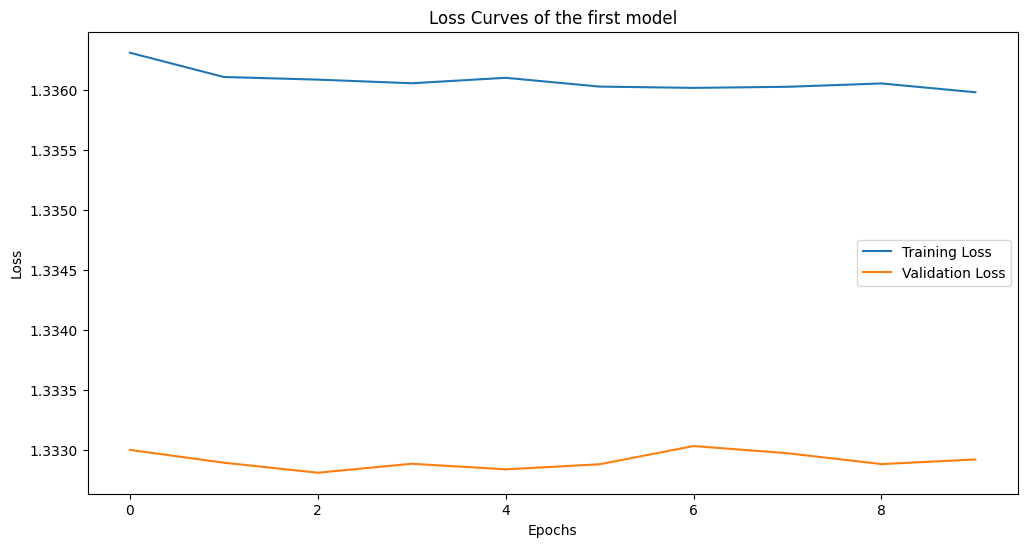

In [26]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves of the first model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


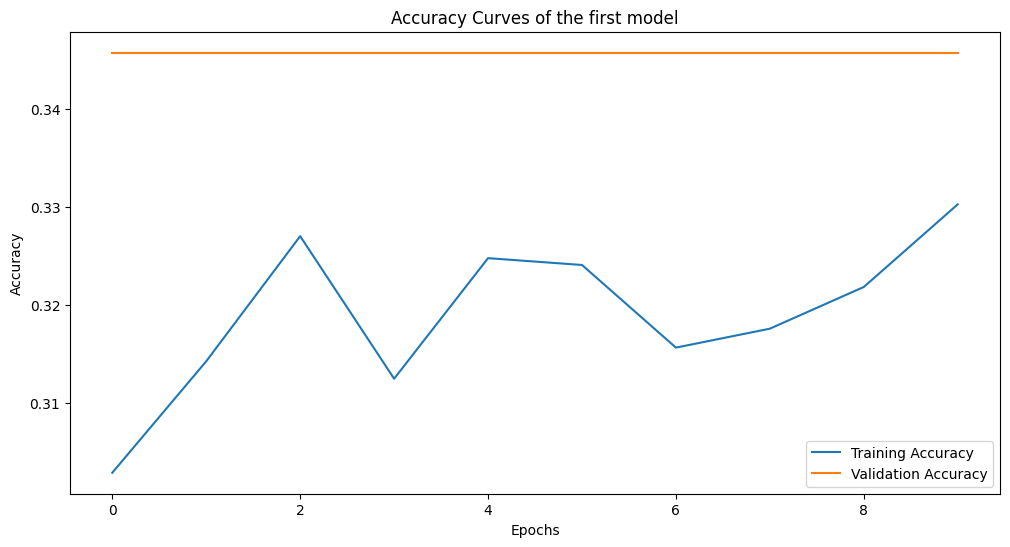

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves of the first model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
keras2ascii(basicmodel)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     45   51    3
              Conv2D    \|/  -------------------       896     0.0%
             sigmoid   #####     43   49   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     21   24   32
             Flatten   ||||| -------------------         0     0.0%
                       #####       16128
               Dense   XXXXX -------------------   2064512    99.9%
             sigmoid   #####         128
               Dense   XXXXX -------------------       516     0.0%
             softmax   #####           4


##test2
Creating a more complex model by adding convolution layers and maxpooling layers.

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [30]:
loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.001

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [31]:
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=1000, validation_split = 0.2)
model.summary()

Epoch 1/10
13/13 [==============================] - 41s 3s/step - loss: 1.2816 - accuracy: 0.3835 - val_loss: 1.1493 - val_accuracy: 0.5100
Epoch 2/10
13/13 [==============================] - 41s 3s/step - loss: 1.0508 - accuracy: 0.5371 - val_loss: 0.9059 - val_accuracy: 0.6491
Epoch 3/10
13/13 [==============================] - 38s 3s/step - loss: 0.8886 - accuracy: 0.6402 - val_loss: 0.7686 - val_accuracy: 0.7062
Epoch 4/10
13/13 [==============================] - 40s 3s/step - loss: 0.7803 - accuracy: 0.6875 - val_loss: 0.6755 - val_accuracy: 0.7371
Epoch 5/10
13/13 [==============================] - 41s 3s/step - loss: 0.7159 - accuracy: 0.7183 - val_loss: 0.6187 - val_accuracy: 0.7492
Epoch 6/10
13/13 [==============================] - 40s 3s/step - loss: 0.6620 - accuracy: 0.7374 - val_loss: 0.5769 - val_accuracy: 0.7705
Epoch 7/10
13/13 [==============================] - 43s 3s/step - loss: 0.6256 - accuracy: 0.7542 - val_loss: 0.5410 - val_accuracy: 0.7881
Epoch 8/10
13/13 [==

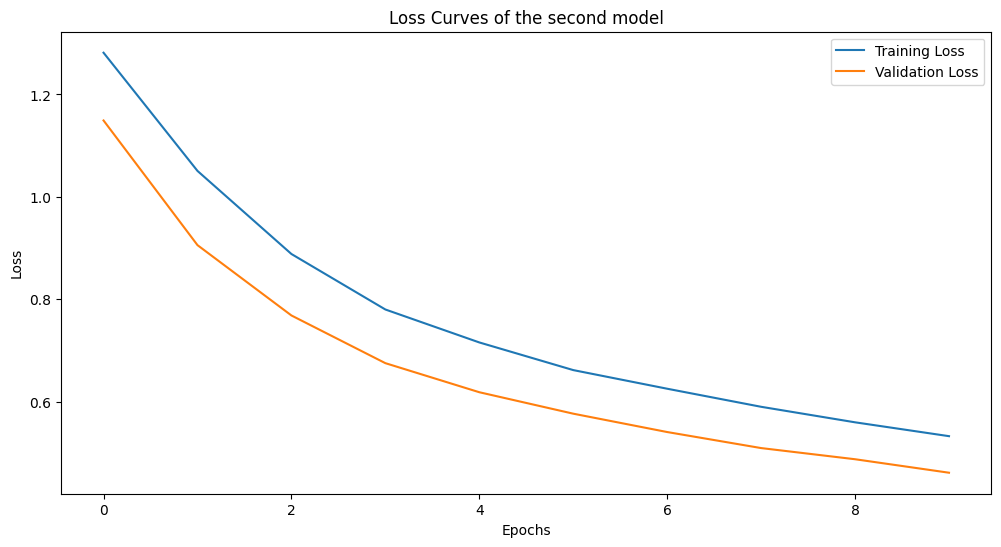

In [33]:
train_loss1 = history.history['loss']
train_accuracy1 = history.history['accuracy']

val_loss1 = history.history['val_loss']
val_accuracy1 = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation Loss')
plt.title('Loss Curves of the second model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

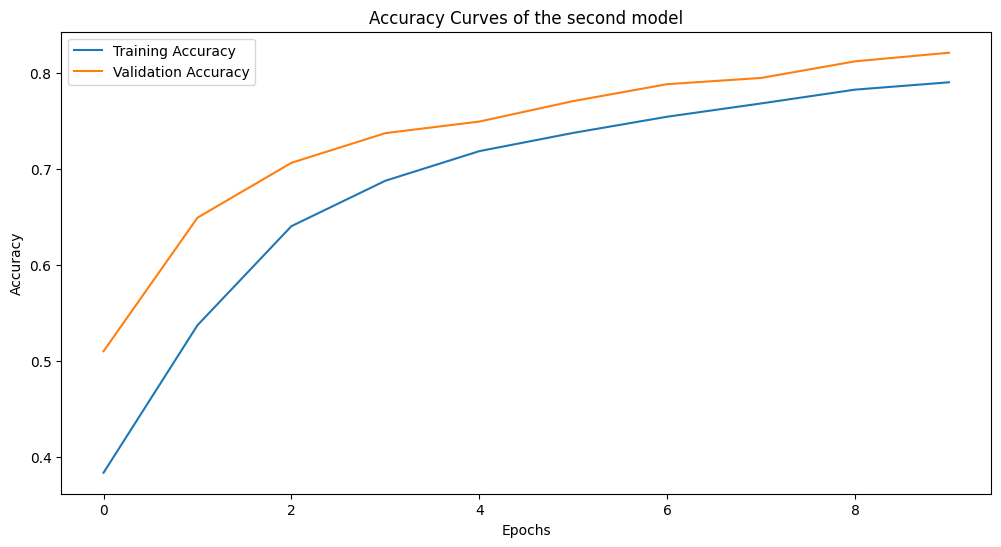

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy1, label='Training Accuracy')
plt.plot(val_accuracy1, label='Validation Accuracy')
plt.title('Accuracy Curves of the second model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     45   51    3
              Conv2D    \|/  -------------------       896     0.1%
                relu   #####     43   49   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     21   24   32
              Conv2D    \|/  -------------------     18496     2.2%
                relu   #####     19   22   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      9   11   64
             Dropout    | || -------------------         0     0.0%
                       #####      9   11   64
             Flatten   ||||| -------------------         0     0.0%
                       #####        6336
               Dense   XXXXX -------------------    811136    97.6%
                relu   #####         128
             Dropout    | || -------------------         0     0.0%
                       #

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
ids = np.arange(len(predictions))
predictions_with_id = np.vstack((ids, predictions)).T
column_names = ['id', 'target']
df = pd.DataFrame(predictions_with_id, columns=column_names)
df.to_csv('sample_subbmission.csv', index=False)

150/150 [==============================] - 1s 4ms/step


##test3

**Updated CNN**
 1. more convolution layer,
 2. more dropout,
 3. more MaxPooling,
 4. change of hyperparameters : increasing epochs (from10 to 20) and increasing batch size (from 1000 to 1500)**




In [36]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))

In [37]:
loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.001

model2.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [38]:
history = model2.fit(X_train, y_train_encoded, epochs=20, batch_size=1500, validation_split = 0.2)
model2.summary()

Epoch 1/20
9/9 [==============================] - 70s 7s/step - loss: 1.3481 - accuracy: 0.3294 - val_loss: 1.3177 - val_accuracy: 0.3868
Epoch 2/20
9/9 [==============================] - 71s 8s/step - loss: 1.2716 - accuracy: 0.4018 - val_loss: 1.1508 - val_accuracy: 0.4971
Epoch 3/20
9/9 [==============================] - 69s 8s/step - loss: 1.1093 - accuracy: 0.4888 - val_loss: 1.0220 - val_accuracy: 0.5063
Epoch 4/20
9/9 [==============================] - 71s 8s/step - loss: 1.0012 - accuracy: 0.5122 - val_loss: 0.9308 - val_accuracy: 0.5968
Epoch 5/20
9/9 [==============================] - 69s 8s/step - loss: 0.9236 - accuracy: 0.5738 - val_loss: 0.8279 - val_accuracy: 0.6648
Epoch 6/20
9/9 [==============================] - 66s 7s/step - loss: 0.8322 - accuracy: 0.6518 - val_loss: 0.7301 - val_accuracy: 0.6701
Epoch 7/20
9/9 [==============================] - 66s 7s/step - loss: 0.7358 - accuracy: 0.6877 - val_loss: 0.6265 - val_accuracy: 0.7251
Epoch 8/20
9/9 [==================

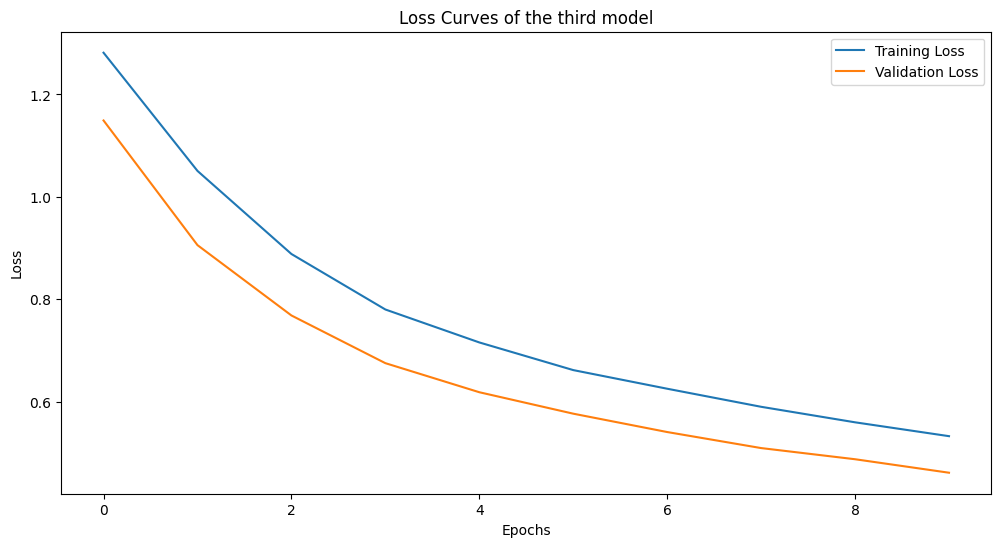

In [40]:
train_loss2 = history.history['loss']
train_accuracy2 = history.history['accuracy']

val_loss2 = history.history['val_loss']
val_accuracy2 = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation Loss')
plt.title('Loss Curves of the third model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

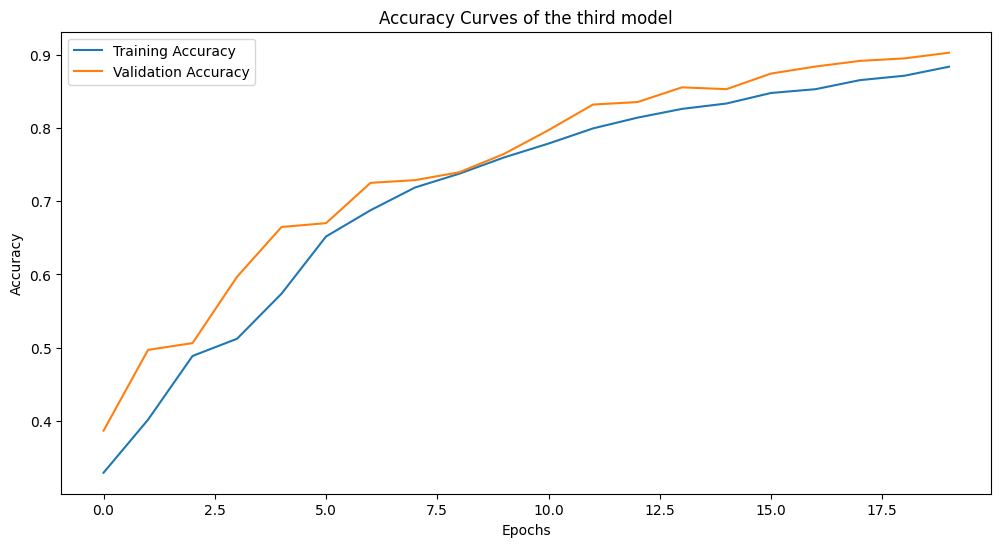

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy2, label='Training Accuracy')
plt.plot(val_accuracy2, label='Validation Accuracy')
plt.title('Accuracy Curves of the third model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions2 = model2.predict(X_test)
predictions2 = np.argmax(predictions2, axis=1)
ids2 = np.arange(len(predictions2))

predictions2_with_id = np.vstack((ids2, predictions2)).T

column_names = ['id', 'target']

df = pd.DataFrame(predictions2_with_id, columns=column_names)
df.to_csv('sample_subbmission2.csv', index=False)

150/150 [==============================] - 1s 4ms/step


##test4
**Updated CNN**
- Increasing significantly epochs (from 20 to 100) and batch_size (from 1500 to 12000)

In [43]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(4, activation='softmax'))

loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam()
metrics = ['accuracy']
learning_rate = 0.0005

model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model3.fit(X_train, y_train_encoded, epochs=100, batch_size=12000, validation_split = 0.2)

Epoch 1/100


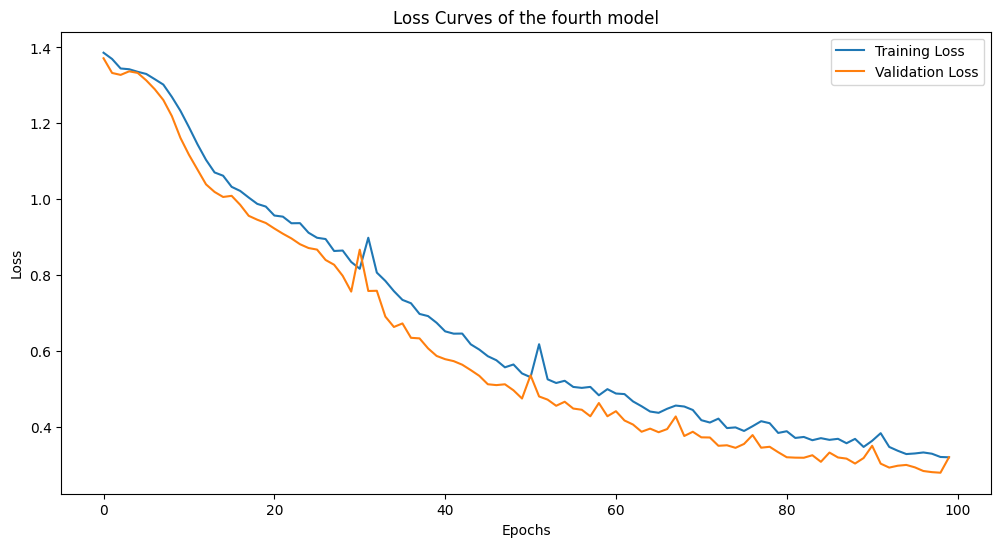

In [46]:
train_loss3 = history.history['loss']
train_accuracy3 = history.history['accuracy']

val_loss3 = history.history['val_loss']
val_accuracy3 = history.history['val_accuracy']

# Tracé des courbes de perte
plt.figure(figsize=(12, 6))
plt.plot(train_loss3, label='Training Loss')
plt.plot(val_loss3, label='Validation Loss')
plt.title('Loss Curves of the fourth model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


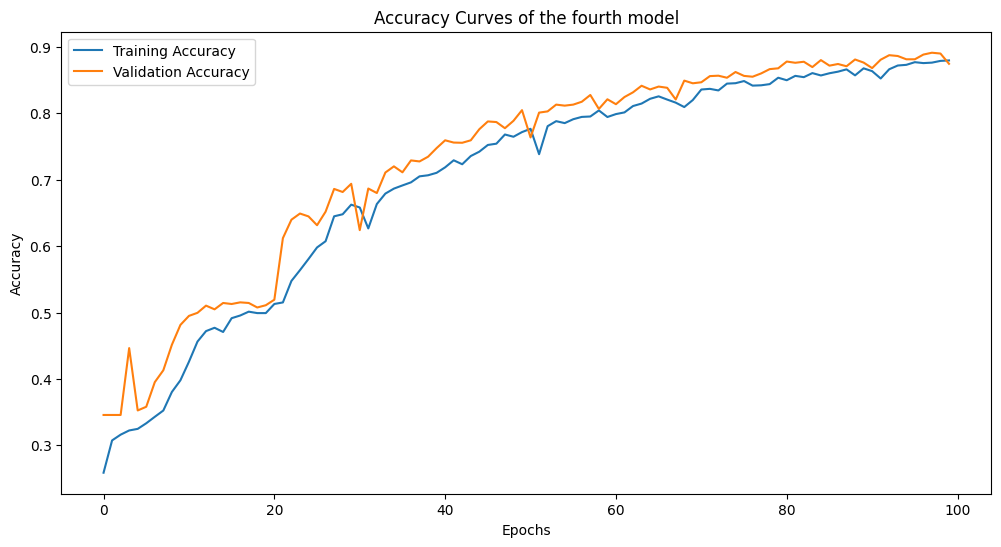

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy3, label='Training Accuracy')
plt.plot(val_accuracy3, label='Validation Accuracy')
plt.title('Accuracy Curves of the fourth model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [27]:
keras2ascii(model3)

NameError: name 'model3' is not defined

In [ ]:
predictions3 = model3.predict(X_test)
predictions3 = np.argmax(predictions3, axis=1)
ids3 = np.arange(len(predictions3))

predictions3_with_id = np.vstack((ids3, predictions3)).T

column_names = ['id', 'target']

df = pd.DataFrame(predictions3_with_id, columns=column_names)
df.to_csv('sample_subbmission10.csv', index=False)

150/150 [==============================] - 1s 3ms/step


##test5
**Continue to try update it**
 1. more convolution layer,
 2. more dropout,
 3. more MaxPooling,
 4. change hyperparameters ; decreasing epochs (from 100 to 50) and batch sizes (from 12000 to 4000)

Very bad for now

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(45, 51, 3),kernel_regularizer=l2(0.001)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(45, 51, 3),kernel_regularizer=l2(0.001)))
model4.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model4.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(4, activation='softmax'))

loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.0005

model4.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model4.fit(X_train, y_train_encoded, epochs=50, batch_size=4000, validation_split = 0.2)

Epoch 1/50
4/4 [==============================] - 21s 2s/step - loss: 1.4595 - accuracy: 0.3132 - val_loss: 1.4090 - val_accuracy: 0.3457
Epoch 2/50
4/4 [==============================] - 2s 514ms/step - loss: 1.4176 - accuracy: 0.3217 - val_loss: 1.4065 - val_accuracy: 0.3457
Epoch 3/50
4/4 [==============================] - 2s 409ms/step - loss: 1.4058 - accuracy: 0.3170 - val_loss: 1.3917 - val_accuracy: 0.3457
Epoch 4/50
4/4 [==============================] - 1s 329ms/step - loss: 1.3941 - accuracy: 0.3284 - val_loss: 1.3828 - val_accuracy: 0.3457
Epoch 5/50
4/4 [==============================] - 1s 303ms/step - loss: 1.3818 - accuracy: 0.3327 - val_loss: 1.3669 - val_accuracy: 0.3457
Epoch 6/50
4/4 [==============================] - 1s 391ms/step - loss: 1.3686 - accuracy: 0.3310 - val_loss: 1.3408 - val_accuracy: 0.3457
Epoch 7/50
4/4 [==============================] - 1s 325ms/step - loss: 1.3279 - accuracy: 0.3533 - val_loss: 1.2640 - val_accuracy: 0.4303
Epoch 8/50
4/4 [======

In [ ]:
predictions4 = model4.predict(X_test)
predictions4 = np.argmax(predictions4, axis=1)
ids4 = np.arange(len(predictions4))

predictions4_with_id = np.vstack((ids4, predictions4)).T

column_names = ['id', 'target']

df = pd.DataFrame(predictions4_with_id, columns=column_names)
df.to_csv('sample_subbmission6.csv', index=False)

150/150 [==============================] - 2s 8ms/step


**Utilisation CNN Package PyTorch**

**Utilisation VGG16**
Voir Tutoriel "https://builtin.com/machine-learning/vgg16"

In [ ]:
modelVGG16 = Sequential()
modelVGG16.add(Conv2D(input_shape=(45,51,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelVGG16.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

modelVGG16.add(Flatten())
modelVGG16.add(Dense(units=4096,activation="relu"))
modelVGG16.add(Dense(units=4096,activation="relu"))
modelVGG16.add(Dense(units=4, activation="softmax"))

In [ ]:
opt = Adam(lr=0.001)
modelVGG16.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
modelVGG16.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 45, 51, 64)        1792      
                                                                 
 conv2d_24 (Conv2D)          (None, 45, 51, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 22, 25, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 22, 25, 128)       73856     
                                                                 
 conv2d_26 (Conv2D)          (None, 22, 25, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 11, 12, 128)       0         
 ng2D)                                                

In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
#histVGG16 = modelVGG16.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])
histVGG16 = modelVGG16.fit(X_train, y_train_encoded,steps_per_epoch=50, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10


 1/50 [..............................] - ETA: 13:46 - loss: 1.3863 - accuracy: 0.1265

 2/50 [>.............................] - ETA: 12s - loss: 1.3826 - accuracy: 0.2269  

 3/50 [>.............................] - ETA: 11s - loss: 1.6076 - accuracy: 0.2788

 4/50 [=>............................] - ETA: 11s - loss: 1.5491 - accuracy: 0.2747

 5/50 [==>...........................] - ETA: 11s - loss: 1.5148 - accuracy: 0.2759

 6/50 [==>...........................] - ETA: 11s - loss: 1.4913 - accuracy: 0.2757

 7/50 [===>..........................] - ETA: 10s - loss: 1.4740 - accuracy: 0.2751

 8/50 [===>..........................] - ETA: 10s - loss: 1.4609 - accuracy: 0.2747

 9/50 [====>.........................] - ETA: 10s - loss: 1.4498 - accuracy: 0.2781

10/50 [=====>........................] - ETA: 10s - loss: 1.4411 - accuracy: 0.2741

11/50 [=====>........................] - ETA: 9s - loss: 1.4325 - accuracy: 0.2775 

12/50 [======>.......................] - ETA: 9s - loss: 1.4242 - accuracy: 0.2850

13/50 [======>.......................] - ETA: 9s - loss: 1.4175 - accuracy: 0.2880

14/50 [=======>......................] - ETA: 9s - loss: 1.4114 - accuracy: 0.2906

15/50 [========>.....................] - ETA: 8s - loss: 1.4066 - accuracy: 0.2949

16/50 [========>.....................] - ETA: 8s - loss: 1.4020 - accuracy: 0.2957

17/50 [=========>....................] - ETA: 8s - loss: 1.3973 - accuracy: 0.2977

18/50 [=========>....................] - ETA: 8s - loss: 1.3937 - accuracy: 0.3020

19/50 [==========>...................] - ETA: 7s - loss: 1.3906 - accuracy: 0.3054

20/50 [===========>..................] - ETA: 7s - loss: 1.3889 - accuracy: 0.3062

21/50 [===========>..................] - ETA: 7s - loss: 1.3868 - accuracy: 0.3076

22/50 [============>.................] - ETA: 7s - loss: 1.3843 - accuracy: 0.3109

23/50 [============>.................] - ETA: 6s - loss: 1.3814 - accuracy: 0.3121

24/50 [=============>................] - ETA: 6s - loss: 1.3798 - accuracy: 0.3126

25/50 [==============>...............] - ETA: 6s - loss: 1.3771 - accuracy: 0.3142

26/50 [==============>...............] - ETA: 6s - loss: 1.3760 - accuracy: 0.3158

27/50 [===============>..............] - ETA: 5s - loss: 1.3748 - accuracy: 0.3162

28/50 [===============>..............] - ETA: 5s - loss: 1.3721 - accuracy: 0.3175

29/50 [================>.............] - ETA: 5s - loss: 1.3714 - accuracy: 0.3173

30/50 [=================>............] - ETA: 5s - loss: 1.3702 - accuracy: 0.3185

31/50 [=================>............] - ETA: 4s - loss: 1.3699 - accuracy: 0.3176

32/50 [==================>...........] - ETA: 4s - loss: 1.3693 - accuracy: 0.3168

33/50 [==================>...........] - ETA: 4s - loss: 1.3679 - accuracy: 0.3177

34/50 [===================>..........] - ETA: 4s - loss: 1.3669 - accuracy: 0.3183

35/50 [====================>.........] - ETA: 3s - loss: 1.3651 - accuracy: 0.3190

36/50 [====================>.........] - ETA: 3s - loss: 1.3636 - accuracy: 0.3191

37/50 [=====================>........] - ETA: 3s - loss: 1.3631 - accuracy: 0.3195

38/50 [=====================>........] - ETA: 3s - loss: 1.3623 - accuracy: 0.3201

39/50 [======================>.......] - ETA: 2s - loss: 1.3617 - accuracy: 0.3209

40/50 [=======================>......] - ETA: 2s - loss: 1.3608 - accuracy: 0.3216

41/50 [=======================>......] - ETA: 2s - loss: 1.3602 - accuracy: 0.3220

42/50 [========================>.....] - ETA: 1s - loss: 1.3600 - accuracy: 0.3224

43/50 [========================>.....] - ETA: 1s - loss: 1.3598 - accuracy: 0.3226

44/50 [=========================>....] - ETA: 1s - loss: 1.3594 - accuracy: 0.3228

45/50 [==========================>...] - ETA: 1s - loss: 1.3586 - accuracy: 0.3233

46/50 [==========================>...] - ETA: 0s - loss: 1.3584 - accuracy: 0.3236

47/50 [===========================>..] - ETA: 0s - loss: 1.3583 - accuracy: 0.3225

48/50 [===========================>..] - ETA: 0s - loss: 1.3584 - accuracy: 0.3215

49/50 [============================>.] - ETA: 0s - loss: 1.3578 - accuracy: 0.3220

50/50 [==============================] - ETA: 0s - loss: 1.3579 - accuracy: 0.3220

50/50 [==============================] - 39s 459ms/step - loss: 1.3579 - accuracy: 0.3220
Epoch 2/10


 1/50 [..............................] - ETA: 11s - loss: 1.3486 - accuracy: 0.2963

 2/50 [>.............................] - ETA: 12s - loss: 1.3439 - accuracy: 0.3133

 3/50 [>.............................] - ETA: 11s - loss: 1.3344 - accuracy: 0.3323

 4/50 [=>............................] - ETA: 11s - loss: 1.3318 - accuracy: 0.3395

 5/50 [==>...........................] - ETA: 11s - loss: 1.3349 - accuracy: 0.3346

 6/50 [==>...........................] - ETA: 10s - loss: 1.3353 - accuracy: 0.3369

 7/50 [===>..........................] - ETA: 10s - loss: 1.3370 - accuracy: 0.3382

 8/50 [===>..........................] - ETA: 10s - loss: 1.3368 - accuracy: 0.3407

 9/50 [====>.........................] - ETA: 10s - loss: 1.3354 - accuracy: 0.3405

10/50 [=====>........................] - ETA: 9s - loss: 1.3334 - accuracy: 0.3392 

11/50 [=====>........................] - ETA: 9s - loss: 1.3313 - accuracy: 0.3384

12/50 [======>.......................] - ETA: 9s - loss: 1.3304 - accuracy: 0.3382

13/50 [======>.......................] - ETA: 9s - loss: 1.3317 - accuracy: 0.3381

14/50 [=======>......................] - ETA: 9s - loss: 1.3324 - accuracy: 0.3377

15/50 [========>.....................] - ETA: 8s - loss: 1.3339 - accuracy: 0.3358

16/50 [========>.....................] - ETA: 8s - loss: 1.3347 - accuracy: 0.3337

17/50 [=========>....................] - ETA: 8s - loss: 1.3355 - accuracy: 0.3326

18/50 [=========>....................] - ETA: 8s - loss: 1.3362 - accuracy: 0.3314

19/50 [==========>...................] - ETA: 7s - loss: 1.3364 - accuracy: 0.3317

20/50 [===========>..................] - ETA: 7s - loss: 1.3372 - accuracy: 0.3309

21/50 [===========>..................] - ETA: 7s - loss: 1.3374 - accuracy: 0.3319

22/50 [============>.................] - ETA: 7s - loss: 1.3383 - accuracy: 0.3308

23/50 [============>.................] - ETA: 6s - loss: 1.3381 - accuracy: 0.3321

24/50 [=============>................] - ETA: 6s - loss: 1.3378 - accuracy: 0.3324

25/50 [==============>...............] - ETA: 6s - loss: 1.3376 - accuracy: 0.3323

26/50 [==============>...............] - ETA: 6s - loss: 1.3381 - accuracy: 0.3307

27/50 [===============>..............] - ETA: 5s - loss: 1.3385 - accuracy: 0.3305

28/50 [===============>..............] - ETA: 5s - loss: 1.3377 - accuracy: 0.3315

29/50 [================>.............] - ETA: 5s - loss: 1.3382 - accuracy: 0.3318

30/50 [=================>............] - ETA: 5s - loss: 1.3375 - accuracy: 0.3327

31/50 [=================>............] - ETA: 4s - loss: 1.3372 - accuracy: 0.3306

32/50 [==================>...........] - ETA: 4s - loss: 1.3373 - accuracy: 0.3316

33/50 [==================>...........] - ETA: 4s - loss: 1.3369 - accuracy: 0.3320

34/50 [===================>..........] - ETA: 4s - loss: 1.3372 - accuracy: 0.3316

35/50 [====================>.........] - ETA: 3s - loss: 1.3372 - accuracy: 0.3321

36/50 [====================>.........] - ETA: 3s - loss: 1.3373 - accuracy: 0.3324

37/50 [=====================>........] - ETA: 3s - loss: 1.3374 - accuracy: 0.3338

38/50 [=====================>........] - ETA: 3s - loss: 1.3370 - accuracy: 0.3344

39/50 [======================>.......] - ETA: 2s - loss: 1.3365 - accuracy: 0.3347

40/50 [=======================>......] - ETA: 2s - loss: 1.3359 - accuracy: 0.3356

41/50 [=======================>......] - ETA: 2s - loss: 1.3364 - accuracy: 0.3351

42/50 [========================>.....] - ETA: 2s - loss: 1.3353 - accuracy: 0.3367

43/50 [========================>.....] - ETA: 1s - loss: 1.3360 - accuracy: 0.3358

44/50 [=========================>....] - ETA: 1s - loss: 1.3361 - accuracy: 0.3364

45/50 [==========================>...] - ETA: 1s - loss: 1.3366 - accuracy: 0.3357

46/50 [==========================>...] - ETA: 1s - loss: 1.3364 - accuracy: 0.3354

47/50 [===========================>..] - ETA: 0s - loss: 1.3364 - accuracy: 0.3353

48/50 [===========================>..] - ETA: 0s - loss: 1.3367 - accuracy: 0.3353

49/50 [============================>.] - ETA: 0s - loss: 1.3369 - accuracy: 0.3352

50/50 [==============================] - ETA: 0s - loss: 1.3369 - accuracy: 0.3348

50/50 [==============================] - 13s 257ms/step - loss: 1.3369 - accuracy: 0.3348
Epoch 3/10


 1/50 [..............................] - ETA: 13s - loss: 1.3439 - accuracy: 0.3395

 2/50 [>.............................] - ETA: 12s - loss: 1.3514 - accuracy: 0.3179

 3/50 [>.............................] - ETA: 12s - loss: 1.3546 - accuracy: 0.3241

 4/50 [=>............................] - ETA: 12s - loss: 1.3432 - accuracy: 0.3364

 5/50 [==>...........................] - ETA: 11s - loss: 1.3393 - accuracy: 0.3370

 6/50 [==>...........................] - ETA: 11s - loss: 1.3418 - accuracy: 0.3349

 7/50 [===>..........................] - ETA: 11s - loss: 1.3409 - accuracy: 0.3355

 8/50 [===>..........................] - ETA: 10s - loss: 1.3392 - accuracy: 0.3372

 9/50 [====>.........................] - ETA: 10s - loss: 1.3424 - accuracy: 0.3326

10/50 [=====>........................] - ETA: 10s - loss: 1.3415 - accuracy: 0.3324

11/50 [=====>........................] - ETA: 9s - loss: 1.3404 - accuracy: 0.3322 

12/50 [======>.......................] - ETA: 9s - loss: 1.3402 - accuracy: 0.3297

13/50 [======>.......................] - ETA: 9s - loss: 1.3403 - accuracy: 0.3338

14/50 [=======>......................] - ETA: 9s - loss: 1.3387 - accuracy: 0.3358

15/50 [========>.....................] - ETA: 8s - loss: 1.3387 - accuracy: 0.3364

16/50 [========>.....................] - ETA: 8s - loss: 1.3398 - accuracy: 0.3356

17/50 [=========>....................] - ETA: 8s - loss: 1.3398 - accuracy: 0.3357

18/50 [=========>....................] - ETA: 8s - loss: 1.3380 - accuracy: 0.3395

19/50 [==========>...................] - ETA: 7s - loss: 1.3381 - accuracy: 0.3395

20/50 [===========>..................] - ETA: 7s - loss: 1.3387 - accuracy: 0.3390

21/50 [===========>..................] - ETA: 7s - loss: 1.3385 - accuracy: 0.3388

22/50 [============>.................] - ETA: 7s - loss: 1.3383 - accuracy: 0.3380

23/50 [============>.................] - ETA: 6s - loss: 1.3368 - accuracy: 0.3396

24/50 [=============>................] - ETA: 6s - loss: 1.3360 - accuracy: 0.3396

25/50 [==============>...............] - ETA: 6s - loss: 1.3358 - accuracy: 0.3401

26/50 [==============>...............] - ETA: 6s - loss: 1.3366 - accuracy: 0.3387

27/50 [===============>..............] - ETA: 5s - loss: 1.3356 - accuracy: 0.3392

28/50 [===============>..............] - ETA: 5s - loss: 1.3352 - accuracy: 0.3390

29/50 [================>.............] - ETA: 5s - loss: 1.3357 - accuracy: 0.3392

30/50 [=================>............] - ETA: 5s - loss: 1.3363 - accuracy: 0.3398

31/50 [=================>............] - ETA: 4s - loss: 1.3361 - accuracy: 0.3401

32/50 [==================>...........] - ETA: 4s - loss: 1.3352 - accuracy: 0.3401

33/50 [==================>...........] - ETA: 4s - loss: 1.3359 - accuracy: 0.3393

34/50 [===================>..........] - ETA: 4s - loss: 1.3356 - accuracy: 0.3378

35/50 [====================>.........] - ETA: 3s - loss: 1.3357 - accuracy: 0.3384

36/50 [====================>.........] - ETA: 3s - loss: 1.3351 - accuracy: 0.3387

37/50 [=====================>........] - ETA: 3s - loss: 1.3349 - accuracy: 0.3388

38/50 [=====================>........] - ETA: 3s - loss: 1.3354 - accuracy: 0.3380

39/50 [======================>.......] - ETA: 2s - loss: 1.3356 - accuracy: 0.3386

40/50 [=======================>......] - ETA: 2s - loss: 1.3353 - accuracy: 0.3387

41/50 [=======================>......] - ETA: 2s - loss: 1.3353 - accuracy: 0.3385

42/50 [========================>.....] - ETA: 2s - loss: 1.3347 - accuracy: 0.3378

43/50 [========================>.....] - ETA: 1s - loss: 1.3351 - accuracy: 0.3364

44/50 [=========================>....] - ETA: 1s - loss: 1.3349 - accuracy: 0.3359

45/50 [==========================>...] - ETA: 1s - loss: 1.3354 - accuracy: 0.3357

46/50 [==========================>...] - ETA: 1s - loss: 1.3351 - accuracy: 0.3354

47/50 [===========================>..] - ETA: 0s - loss: 1.3350 - accuracy: 0.3350

48/50 [===========================>..] - ETA: 0s - loss: 1.3362 - accuracy: 0.3337

49/50 [============================>.] - ETA: 0s - loss: 1.3358 - accuracy: 0.3340

50/50 [==============================] - ETA: 0s - loss: 1.3355 - accuracy: 0.3348

50/50 [==============================] - 13s 253ms/step - loss: 1.3355 - accuracy: 0.3348
Epoch 4/10


 1/50 [..............................] - ETA: 12s - loss: 1.3094 - accuracy: 0.3673

 2/50 [>.............................] - ETA: 12s - loss: 1.3298 - accuracy: 0.3596

 3/50 [>.............................] - ETA: 11s - loss: 1.3307 - accuracy: 0.3508

 4/50 [=>............................] - ETA: 11s - loss: 1.3353 - accuracy: 0.3457

 5/50 [==>...........................] - ETA: 11s - loss: 1.3370 - accuracy: 0.3383

 6/50 [==>...........................] - ETA: 11s - loss: 1.3376 - accuracy: 0.3374

 7/50 [===>..........................] - ETA: 10s - loss: 1.3363 - accuracy: 0.3329

 8/50 [===>..........................] - ETA: 10s - loss: 1.3358 - accuracy: 0.3283

 9/50 [====>.........................] - ETA: 10s - loss: 1.3351 - accuracy: 0.3333

10/50 [=====>........................] - ETA: 10s - loss: 1.3353 - accuracy: 0.3346

11/50 [=====>........................] - ETA: 9s - loss: 1.3357 - accuracy: 0.3305 

12/50 [======>.......................] - ETA: 9s - loss: 1.3354 - accuracy: 0.3336

13/50 [======>.......................] - ETA: 9s - loss: 1.3328 - accuracy: 0.3352

14/50 [=======>......................] - ETA: 9s - loss: 1.3307 - accuracy: 0.3358

15/50 [========>.....................] - ETA: 8s - loss: 1.3313 - accuracy: 0.3370

16/50 [========>.....................] - ETA: 8s - loss: 1.3340 - accuracy: 0.3347

17/50 [=========>....................] - ETA: 8s - loss: 1.3345 - accuracy: 0.3353

18/50 [=========>....................] - ETA: 8s - loss: 1.3337 - accuracy: 0.3344

KeyboardInterrupt: 

In [ ]:
plt.plot(histVGG16.history["acc"])
plt.plot(histVGG16.history['val_acc'])
plt.plot(histVGG16.history['loss'])
plt.plot(histVGG16.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

**Trying something new** https://www.kaggle.com/code/arbazkhan971/image-classification-using-cnn-94-accuracy

In [ ]:
!pip install fastai

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [ ]:
learn = cnn_learner(X_train, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

NameError: name 'cnn_learner' is not defined